In [1]:
import numpy as np
import os
import math
import shutil

from PIL import Image
import pandas as pd
# Clustering
from sklearn.cluster import AgglomerativeClustering # 1) Agglomerative-Hierarchical
from sklearn.cluster import KMeans                  # 2) K-Means
from sklearn.mixture import GaussianMixture         # 3) Gaussian Mixture Models
from sklearn import metrics

from skimage.color import rgb2hed
from sklearn.preprocessing import StandardScaler
# Evaluation
from sklearn import metrics
from skimage.external import tifffile
from skimage.measure import compare_mse
from skimage.metrics import structural_similarity as ssim
from sklearn.decomposition import PCA, KernelPCA               # 2) PCA

import matplotlib.pyplot as plt 
%matplotlib inline

import newscripts as myutils

Using TensorFlow backend.


In [2]:
directory = "../../Data/train"
# csvFilePath = "../../Data/regrData/train_labels.csv"

mean_List = []
image_names = []

for filename in os.listdir(directory):
    if filename.endswith('tif'):
        image = Image.open(os.path.join(directory, filename))
        image_names.append(filename)
        mean_List.append(myutils.calculateMeanHE(image) + myutils.calculateMeanRGB(image))

meanMatrix = np.asarray(mean_List)

# Standardize the dataset by removing the mean and scaling to unit variance z =(x-u)/s
scaler = StandardScaler()
scaledData = scaler.fit_transform(meanMatrix)
labels_true = myutils.loadLabelsFromsubdirectoryindex(kather_names, "../../Data/Kather_5000")

NameError: name 'calculateMeanHE' is not defined

In [2]:
# Get the test labels from the directory name

labels_directory = "../../Data/Kather_all"

kather_List = []
kather_names = []

for filename in os.listdir(labels_directory):
    if filename.endswith('tif'):
        image = Image.open(os.path.join(labels_directory, filename))
        kather_names.append(filename)
        kather_List.append(myutils.calculateMeanHE(image) + myutils.calculateMeanRGB(image))

katherMatrix = np.asarray(kather_List)
# np.random.shuffle(katherMatrix)

scaler = StandardScaler()
scaledkather = scaler.fit_transform(katherMatrix)
labels_true = myutils.loadLabelsFromsubdirectoryindex(kather_names, "../../Data/Kather_5000")

(5000, 5)
HC Silhouette Score  0.3857876192403105 
kmeans Silhouette Score  0.477596971513917 
gmm Silhouette Score  0.4410777201076393 


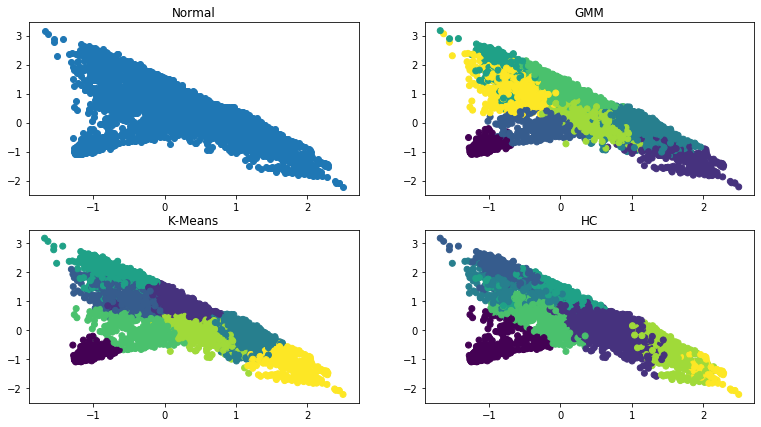

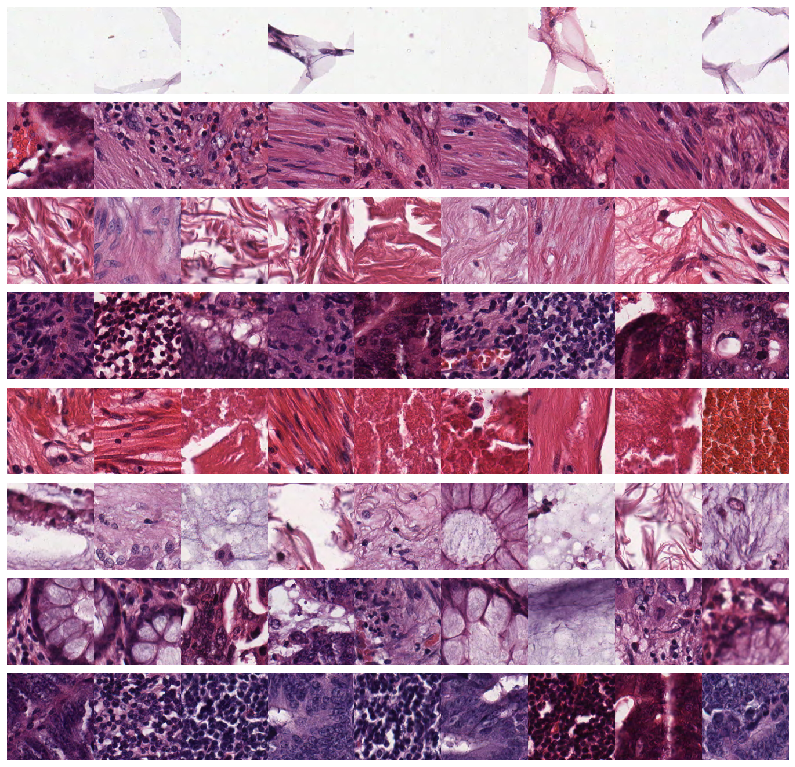

In [3]:
Labels = myutils.ClusterAndPlot(8, scaledkather)
myutils.clusterintoDirectories(Labels[1], labels_directory, kather_names)
myutils.pltPathologyClusters(Labels[1], labels_directory)

In [4]:

myutils.evaluateAll3withLabels(Labels, labels_true)

GMM Adjusted Rand index 0.5741642495210899
GMM homogeneity_score 0.5590907783378822
GMM adjusted_rand_score 0.45034780685797376
GMM completeness_score 0.5922655962356809
GMM v_measure_score 0.5710864667969329


(5000, 2)
HC Silhouette Score  0.3918884653433893 
kmeans Silhouette Score  0.4946895032774211 
gmm Silhouette Score  0.3375154545856376 


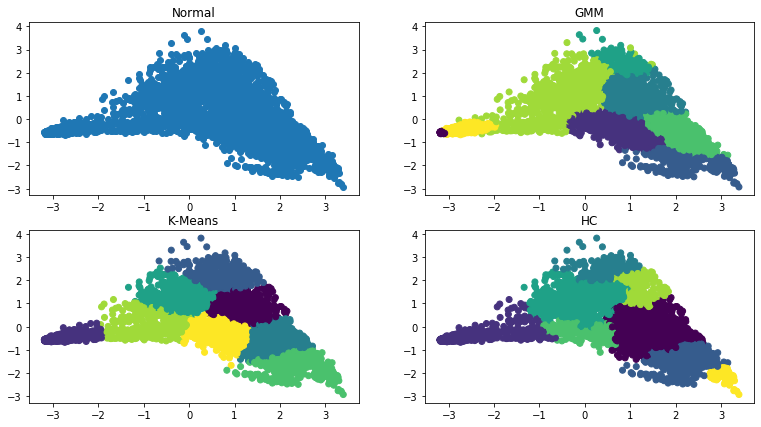

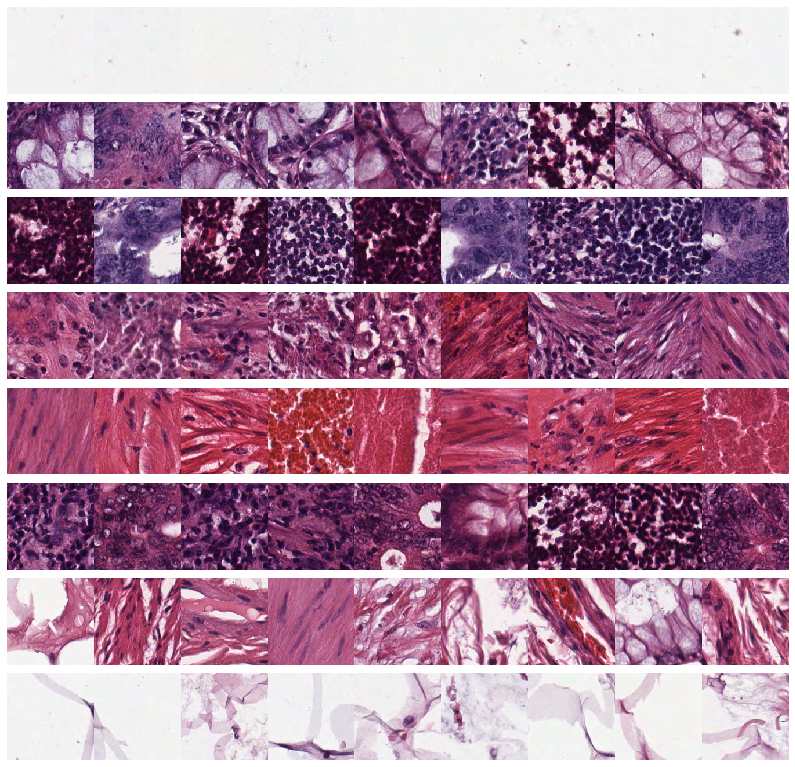

In [3]:
# PCA 
pca = PCA(n_components=2)
transformedData = pca.fit_transform(scaledkather)

Labels = myutils.ClusterAndPlot(8, transformedData)
myutils.clusterintoDirectories(Labels[2], labels_directory, kather_names)
myutils.pltPathologyClusters(Labels[2], labels_directory)

In [4]:
pca.explained_variance_ratio_

array([0.74941329, 0.24272085])

In [7]:
myutils.evaluateAll3withLabels(Labels, labels_true)

GMM Adjusted Rand index 0.5877751822324253
GMM homogeneity_score 0.5789667280170909
GMM adjusted_rand_score 0.4799354487432711
GMM completeness_score 0.5989034253388414
GMM v_measure_score 0.5862854764963003
